# Movielens Case Study

**DESCRIPTION**  
find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

  1- User Age Distribution  
  2- User rating of the movie “Toy Story”  
  3- Top 25 movies by viewership rating  
  4- Find the ratings for all the movies reviewed by for a particular user of user id = 2696  
- Feature Engineering:  
    Use column genres:  

 1- Find out all the unique genres.   
 2- Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.   
 3- Determine the features affecting the ratings of any particular movie.  
 4- Develop an appropriate model to predict the movie ratings



In [2]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Preproccing:

## Import The Datasets:

### Movies Dataset:


In [3]:
movies =pd.read_csv('./Data_science_with_Python_1/movies.dat',engine='python', sep='::',
                    names=['MovieID', 'Title','Genres'])

In [4]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.shape

(3883, 3)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


### Ratings Dataset:

In [7]:
ratings =pd.read_csv('./Data_science_with_Python_1/ratings.dat',engine='python', sep='::', 
                     names=['UserID','MovieID','Rating','Timestamp'])


In [8]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
ratings.shape

(1000209, 4)

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


### Users Dataset:

In [11]:
users =pd.read_csv('./Data_science_with_Python_1/users.dat',engine='python', sep='::',
                   names=['UserID','Gender','Age','Occupation','Zip-code'])


In [12]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [13]:
users.shape

(6040, 5)

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


## New Dataset (Master_Data):


Creat new dataset from the 3 datasets above with the following columns:   
- MovieID.
- Title.  
- UserID.    
- Age.    
- Gender.    
- Occupation.   
- Rating. 

In [15]:
# merge movies and ratings dataframes with movie id as primary key
df = pd.merge(movies,ratings,on='MovieID')
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [16]:
# merge the new dataframe with users dataframe with user id as primary key
master_data = pd.merge(df, users,on='UserID')
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [17]:
# drop genres, Timestamp, Zip-code from the new dataframe
master_data.drop(['Genres','Timestamp','Zip-code'],axis=1,inplace=True)

In [18]:
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


In [19]:
master_data.shape

(1000209, 7)

In [20]:

master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
UserID        1000209 non-null int64
Rating        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [21]:
# basic stat overview
master_data.describe(include='all')

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
count,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06
unique,NaN,3706,NaN,NaN,2,NaN,NaN
top,NaN,American Beauty (1999),NaN,NaN,M,NaN,NaN
freq,NaN,3428,NaN,NaN,753769,NaN,NaN
mean,1.865540e+03,NaN,3.024512e+03,3.581564e+00,NaN,2.973831e+01,8.036138e+00
std,1.096041e+03,NaN,1.728413e+03,1.117102e+00,NaN,1.175198e+01,6.531336e+00
min,1.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,1.030000e+03,NaN,1.506000e+03,3.000000e+00,NaN,2.500000e+01,2.000000e+00
50%,1.835000e+03,NaN,3.070000e+03,4.000000e+00,NaN,2.500000e+01,7.000000e+00
75%,2.770000e+03,NaN,4.476000e+03,4.000000e+00,NaN,3.500000e+01,1.400000e+01


In [22]:
# check for NaNs
master_data.isnull().sum()

MovieID       0
Title         0
UserID        0
Rating        0
Gender        0
Age           0
Occupation    0
dtype: int64

In [23]:
# check for duplication
master_data.duplicated().sum()

0

#### Users age Distribution

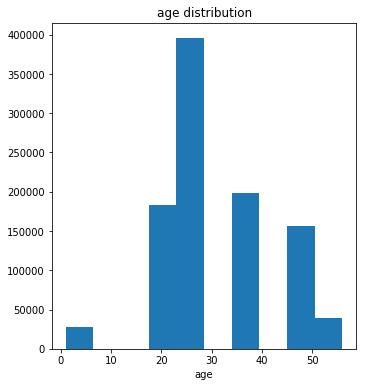

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(master_data['Age'], bins=10)
plt.title('age distribution')
plt.xlabel('age');


outtakes from the plot:
- the age distribution for the users who rated the movies is mostly people in their 20s and 30s.
- younger users don't rate movies a lot.

### Users Gender Distribution

In [25]:
male_perc = round(np.sum(master_data['Gender'] == "M") / len(master_data['Gender']) *100)
female_perc = round(np.sum(master_data['Gender'] == "F") / len(master_data['Gender']) *100)
r = master_data.Rating

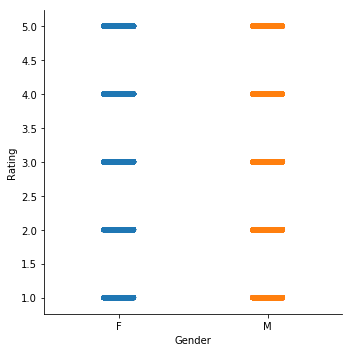

In [27]:
sns.catplot(x='Gender', y='Rating', data=master_data, estimator=lambda x: sum(x=="M")*100.0/len(x));

In [ ]:
barWidth = 0.85
# Create male Bars
plt.bar(r, male_perc, color='#b5ffb9', edgecolor='white', width=barWidth, label="male")
# Create female Bars
plt.bar(r, female_perc, bottom=male_perc, color='#f9bc86', edgecolor='white', width=barWidth, label="female")
 
# Custom x axis
plt.xticks(r)
plt.xlabel("gender")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
master_data['Gender'].plot.bar()
plt.title('gender distribution')
plt.xlabel('gender');

### User rating of the movie “Toy Story”

In [ ]:
toy_story_ratings = master_data[master_data['Title'] == 'Toy Story (1995)']
toy_story_grouped = toy_story_ratings.groupby('Rating')


In [ ]:
# plot of number of ratings for how many stars the movie toy story got
toy_story_grouped.size().plot.bar()
plt.title('number of ratings vs. stars for toy story')
plt.ylabel('number of user');

outtakes from the plot:

- a lot of users rated the movie Toy Story 4 and 5.     

### Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [ ]:
one_user_movies = master_data[master_data['UserID'] == 2696]
one_user_movies

In [ ]:
one_user_movies.shape

#### investigation on user with ID = 2696:
the user with ID = 2696 is a male between the age 25-34 with Occupation in executive/managerial has rated 20 movies. His favorite movie is Lone Star (1996).

Note: I will use this user after i made my recommendation model to predict other movies for him.

In [ ]:
one_user_movies.plot.bar(x='Title',y='Rating',figsize=(15,6));

### new movies  ratings dataframe

make new dataframe for the average ratings and number of rating for each movie


In [ ]:
# make new dataframe for the average ratings 
ratings_df = pd.DataFrame(master_data.groupby(['MovieID','Title'])['Rating'].mean())
ratings_df.head()

In [ ]:
# add new column for the number of ratings
ratings_df['number_of_ratings'] = master_data.groupby(['MovieID','Title'])['Rating'].count()
ratings_df.head()

In [ ]:
ratings_df.shape

NOTES:

- if the number of ratings is low then the average rating will not be accurate.
- we need to make a threshold for how many rating is considered valid so our recommendation model is more accurate. 

In [ ]:
# reset the index so we can plot the title of the movies 
ratings_df.reset_index(inplace=True)

In [ ]:
# histogram plot for the average ratings
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(ratings_df['Rating'], bins=50)
plt.title('ratings histogram')
plt.xlabel('ratings')

# histogram plot for the number of ratings
plt.subplot(122)
plt.hist(ratings_df['number_of_ratings'], bins=25)
plt.title('number of ratings histogram')
plt.xlabel(' No ratings');


Outtakes from the plot:

- majority of the ratings is between 3 and 4.
- a lot of users did not rate the movies, some of the ratings came from few people.

In [ ]:
# making a plot to check if majority of rating is for popular movies 
sns.scatterplot(x='Rating', y='number_of_ratings', data=ratings_df);

so the scater plot confirms that the more ratings the movie has ,the more popular it is.

### Top 25 movies by viewership rating

In [ ]:
top_25_movies = ratings_df.sort_values('number_of_ratings',ascending=False)[:5]
top_25_movies

In [ ]:
# plot of the top 25 viewed movies
top_25_movies.plot.barh(x='Title',y='number_of_ratings',figsize=(16,10));

the top viewed movie is American Beauty with almost 3500 ratings 

## recommendation function without machine learning

First I will make a recommendation function without machine learning with only rating of the movies. then I will make a model with machine learning to give me recommendation with more features and I will compare them.

### pivot table dataframe:

pivot table with userid as index, movies title as columns and ratings as values

In [ ]:
movies_pivot = master_data.pivot_table(index='UserID',
                                columns='Title',
                                values= 'Rating')
movies_pivot

the dataframe have a lot of NaNs values because some users did not rate the movies. 

In [ ]:
movies_pivot.shape

Making a function to recommed movies based on similar ratings

In [ ]:
def recommendation_with_corr(movie, df=movies_pivot):
    '''
    Arguments:
    movie: name of movie as string
    df: name of the dataframe that the movie is in
    
    - you only need to write the name of movie as string
    
    '''
    ratings = df[movie]
    similar= df.corrwith(ratings)
    corr = pd.DataFrame(similar,columns=['correlation'])
    corr.dropna(inplace=True)
    sorted_corr = corr.sort_values(['correlation'],ascending=False)[:5]
    return sorted_corr

### recommendation for user with ID =2696 based on his favorite " Lone Star ":


In [ ]:
# top 5 movies similar to Lone Star
recommendation_with_corr('Lone Star (1996)')

## Feature engineering 

now will start the machine learning model, but first I need to do some feature engineering 
for some feature so I can use them in my model.

### Hote encoding

- X_features:  
    - 'Gender'
    - 'Age'  
    - 'Occupation'   
    - 'Genres'    
- y_target: 'Rating'

- need to change gender to (male:1, female:0).  
- will add the Genres column and make a dummies for all the Genres that we have in the dataframe.
- make new target based on movies rating and number of ratings

In [ ]:
master_data.columns 

In [ ]:
movies['Genres'].head()

In [ ]:
# making dummies from the Genres column
movies_genres = movies['Genres'].str.get_dummies('|').add_prefix('gen_')
movies_genres.head()

In [ ]:
movies_genres.sum()

In [ ]:
movies_genres.shape

In [ ]:
# rejoining the genres columns with movies dataframe 
# rrejoining again so we can use the movie id as primary key when merging with master_data dataframe 
new_movie_with_dummies = pd.concat([movies,movies_genres],sort=False, axis=1)

In [ ]:
new_movie_with_dummies.head()

In [ ]:
new_movie_with_dummies.shape

In [ ]:
# making dummies from the gender column
print(master_data['Gender'].unique())
master_data['Gender'] = master_data['Gender'].map({'F':0,'M':1})
master_data.head()

### Feature Engineering our Target:

In [ ]:
# will use this dataframe as our target 
ratings_df.head()

- I need to set a criteria for the number of ratings so if the number of ratings is low we will not consider it.
- I am going to make new column (weighted average rating) based on IMDB ratings  

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:  
R = average for the movie (mean) = (Rating)  
v = number of votes for the movie = (votes)  
m = minimum votes required to be listed   
C = the mean vote across the whole report   

refrence:
https://www.quora.com/How-does-IMDbs-rating-system-work

In [ ]:
def weighted_rating(r=ratings_df['Rating'],m_votes = 20, v= ratings_df['number_of_ratings']):
    if v.size >= m_votes:
        c= r.mean() 
        wr = round(( v / (v + m_votes) * r + (m_votes / (v + m_votes)) * c))
        return wr

In [ ]:
# make new column for the weighted_rating
ratings_df['weighted_rating'] = weighted_rating()

In [ ]:
ratings_df.head()

In [ ]:
print('features shape:{} \ntarget shape:{}'.format(new_movie_with_dummies.shape, ratings_df.shape))

The shape is inconsistent between our features and the target we need to do some cleaning

In [ ]:
# combaring movieID in our featurs and target then remove movies that are not in both 
movies_df = pd.merge(new_movie_with_dummies,ratings_df,on='MovieID')

In [ ]:
movies_df.shape

In [ ]:
movies_df.head()

In [ ]:
# merging genres and weighted rating columns with master dataframe so we can use it 
final_df = pd.merge(master_data,movies_df,on='MovieID')

In [ ]:
final_df.head()

In [ ]:
final_df.shape

In [ ]:
# drop unnecessary columns
final_df.drop(['Title_x','Title_y','Genres','Rating_x'],axis=1,inplace=True)

now we can choose our features and target for the model.

## Logistic regression 

In [ ]:
x_features = final_df.loc[:,'Gender':'gen_Western'] # will use Gender, Age, Occupation and Genres as our features
y_target = final_df['weighted_rating'] # wighted ratings as our target

In [ ]:
print(x_features.shape,y_target.shape ) # they have equal rows

In [ ]:
# plot the distrebution for the ratings to see if uur classes are imbalanced 
print('the count for every ratings:\n', y_target.value_counts())
sns.countplot(x= y_target);

- the ratings are imbalanced we need to fix this and make them balanced
- we need to fix so our model would not be biased 

In [ ]:
# import model libraries
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


## Oversampling with SMOTE

In [ ]:
# oversample the minore classes like 2 and 5
os = SMOTE(random_state=0)

# split the data to test and train 
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=0)

columns = X_train.columns
# fit the data on SMOTE model 
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
# make new two dataframes for X and y
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.Series(data=os_data_y)

In [ ]:
print(os_data_X.shape, os_data_y.shape)

In [ ]:
os_data_y.value_counts()

In [ ]:
# our new features and target after resampling
X = os_data_X
y = os_data_y

## Logistic Regression Model 

In [ ]:
# split the data to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initiate model 
logreg = LogisticRegression(solver='liblinear', multi_class='auto')

# fit model 
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print('the acuracy score on test set', score)
print(y_pred[:10], y_test[:10].values())

the accuracy score is good but we can enhance the acuracy of the model with Gridsearch

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

their is some misclassified values

## Model evaluation

In [ ]:
# Model evaluation metrics for regression  
print('y-intercept : ', logreg.intercept_)  
print('beta coefficients : ', logreg.coef_)  
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Sq Error MSE : ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('r2 value : ', metrics.r2_score(y_test, y_pred))

## Hyperparameter Tuning Using Grid Search

In [ ]:
# defining hyperparameters
param = {'penalty':['l1', 'l2'],
        'C':np.logspace(0, 4, 10),
        }

In [ ]:
# Create grid search
clf = GridSearchCV(logreg, param, cv=5, verbose=0)

# fit grid search
best_model = clf.fit(X_train, y_train)


In [ ]:
print("Tuned Logistic Regression Parameters: {}".format(best_model.best_params_)) 
print("Best score is {}".format(best_model.best_score_))

In [ ]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print('the acuracy score on test set', score)
print(y_pred[:10], y_test[:10])

## Knn model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

In [ ]:
print(knn_score)
print(knn.predict(y_test))